In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('features_do_obrobki22.csv')

In [3]:
df

,rms_mean,rms_std,rms_max,rms_min,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,f0_mean,f0_std,hnr,filename,subject,condition
0,0.017931,0.019250,0.111144,0.000203,0.011060,0.000064,0.003465,0.005857,0.010395,0.099222,0.787973,0.037504,0.067317,0.172779,176.649887,22.951265,11.798376,audio/2_pos.wav,2,pos
1,0.024871,0.032905,0.168227,0.000037,0.014610,0.000074,0.004114,0.007507,0.012341,0.101817,0.754952,0.041237,0.071470,0.146125,201.147730,25.017070,11.505237,audio/14_neg.wav,14,neg
2,0.038053,0.038166,0.169753,0.000274,0.011936,0.000053,0.002706,0.005138,0.008119,0.106943,0.638403,0.038309,0.066730,0.140863,227.516987,23.271600,14.403130,audio/19_neg.wav,19,neg
3,0.018055,0.025417,0.169625,0.000212,0.013949,0.000079,0.003135,0.005664,0.009404,0.155064,0.852074,0.064805,0.111448,0.226401,182.849631,31.212020,10.530582,audio/18_neut.wav,18,neut
4,0.086125,0.077493,0.266395,0.000146,0.007797,0.000042,0.002580,0.004057,0.007741,0.077477,0.673770,0.029258,0.053634,0.117042,190.461634,23.039585,13.209085,audio/7_neg.wav,7,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.093767,0.101875,0.450404,0.000025,0.012394,0.000059,0.003351,0.005559,0.010053,0.105439,0.777676,0.034824,0.063856,0.151712,211.911909,20.094876,12.022375,audio/3_neut.wav,3,neut
65,0.025872,0.035865,0.222988,0.000027,0.014455,0.000072,0.004110,0.007466,0.012329,0.108382,0.768684,0.040372,0.070444,0.150119,204.992579,27.863604,11.687023,audio/14_pos.wav,14,pos
66,0.007521,0.009095,0.048909,0.000004,0.007714,0.000041,0.002184,0.003707,0.006551,0.110255,0.645221,0.043651,0.066091,0.106690,192.226669,22.582565,10.004964,audio/8_neut.wav,8,neut
67,0.022345,0.031470,0.201110,0.000220,0.014559,0.000080,0.003561,0.006202,0.010683,0.162524,0.815833,0.059204,0.109509,0.232931,187.722206,32.186628,10.857767,audio/18_neg.wav,18,neg


In [5]:
df.isnull().sum()

rms_mean               0
rms_std                0
rms_max                0
rms_min                0
localJitter            0
localabsoluteJitter    0
rapJitter              0
ppq5Jitter             0
ddpJitter              0
localShimmer           0
localdbShimmer         0
apq3Shimmer            0
apq5Shimmer            0
apq11Shimmer           0
f0_mean                0
f0_std                 0
hnr                    0
filename               0
subject                0
condition              0
dtype: int64

In [6]:
df['f0_mean'].groupby(df['condition']).mean()

condition
neg     197.444540
neut    197.256972
pos     198.388218
Name: f0_mean, dtype: float64

In [7]:
art_mean = df[['f0_mean', 'hnr','rms_mean', 'condition']].groupby(df['condition']).mean()

In [8]:
print(art_mean.to_markdown())

| condition   |   f0_mean |     hnr |   rms_mean |
|:------------|----------:|--------:|-----------:|
| neg         |   197.445 | 11.6749 |  0.061282  |
| neut        |   197.257 | 11.641  |  0.0588899 |
| pos         |   198.388 | 11.8001 |  0.0590017 |


In [9]:
art_median = df[['f0_mean', 'hnr','rms_mean', 'condition']].groupby(df['condition']).median()

In [10]:
df.groupby(df['condition']).median()

,rms_mean,rms_std,rms_max,rms_min,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,f0_mean,f0_std,hnr,subject
condition,,,,,,,,,,,,,,,,,,
neg,0.064600,0.077493,0.315176,0.000041,0.010397,0.000053,0.002789,0.004852,0.008368,0.101338,0.745808,0.036293,0.064180,0.141061,197.872192,25.017070,11.597605,12
neut,0.066898,0.072928,0.316067,0.000035,0.009760,0.000052,0.002746,0.004823,0.008238,0.104128,0.755104,0.036627,0.066091,0.140274,198.413973,24.557532,11.682766,12
pos,0.069010,0.078391,0.343143,0.000042,0.010575,0.000054,0.002644,0.004518,0.007933,0.098007,0.729713,0.037677,0.065061,0.149409,200.647060,25.221915,11.794855,12


In [11]:
pg.rm_anova(data=df, dv='f0_mean', within='condition', subject='subject')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,condition,2,44,0.735728,0.484958,0.03236,0.851863


In [58]:
pg.rm_anova(data=df, dv='rms_mean', within='condition', subject='subject', correction=True)

/home/t/miniconda3/envs/projbad/lib/python3.8/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,2,44,1.882401,0.164279,0.167238,0.07882,0.937139,True,inf,1.0


In [59]:
pg.rm_anova(data=df, dv='hnr', within='condition', subject='subject', correction=True)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,2,44,0.747813,0.479321,0.47809,0.032874,0.989676,True,0.989569,0.89574


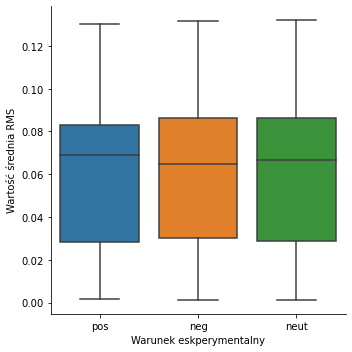

In [13]:
import seaborn as sns
rms_plot = sns.catplot(x='condition', y='rms_mean', data=df, kind='box')
rms_plot.set(xlabel="Warunek eskperymentalny", ylabel = "Wartość średnia RMS")

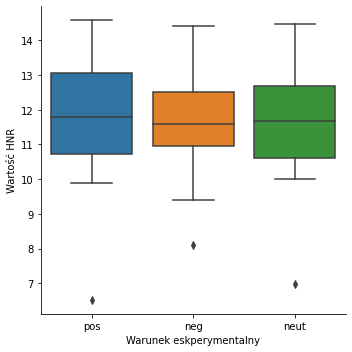

In [18]:
hnr_plot = sns.catplot(x='condition', y='hnr', data=df, kind='box')
hnr_plot.set(xlabel="Warunek eskperymentalny", ylabel = "Wartość HNR")

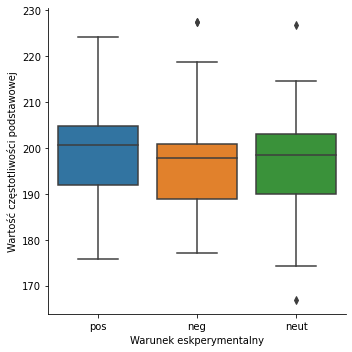

In [22]:
f0_mean_plot = sns.catplot(x='condition', y='f0_mean', data=df, kind='box')
f0_mean_plot.set(xlabel="Warunek eskperymentalny", ylabel = "Wartość częstotliwości podstawowej")

In [23]:
f0_mean_plot.savefig("f0_mean_boxplot.png")